# **ESS314: LAB 7: Magnetics**

**For this lab, you will need to submit this .ipynb file, as well as separate math from Question 3, and drawings or plots from Questions 6 and 9a.** *As usual, questions for submission are in italics.*


Today we will return to GRAVMAG and look at some magnetic data. The magnetic method is quite complicated, so first we will do a few exercises to improve our understanding of the Earth’s magnetic field.

The intensity of the Earth’s magnetic field at some location on the Earth’s surface can be written as a vector $F_{E}$, defined by its inclination i (the angle the vector makes with a horizontal plane) and its declination d (the horizontal angle from geographic north). **Figure 1** below illustrates these concepts. If you find **Figure 1** a little confusing, then **Figure 2** below illustrates these concepts in a different way using a compass needle. Note that Z is positive down.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
from base64 import b64decode

![](Fig1.png)
 <center> **Figure 1.** Diagram illustrating vector FE and its constituent vectors, along with declination and inclination angles d and i, respectively.

![](Fig2.png)
**Figure 2.** Representation of vector FE and its constituent vectors, along with declination and inclination angles d and i, respectively, using a compass schematic.

The total magnetic field can be broken down into its horizontal $H_E$ and vertical $Z_E$ components and be represented as

$$F_E = \sqrt{ (H_E)^2 + (Z_E)^2  }.$$ <div style="text-align: right"> (1) </div>
    
$H_E$ can be further resolved into northward and eastward components ($X_E$ and $Y_E$, respectively):

$$H_E = \sqrt{ (X_E)^2 + (Y_E)^2  }.$$ <div style="text-align: right"> (2) </div>
    
Combining equations (1) and (2), one can represent the magnetic field using
    
$$F_E = \sqrt{ (X_E)^2 + (Y_E)^2 + (Z_E)^2 }.$$ <div style="text-align: right"> (3) </div>


### **Question 1:** 
Use simple trigonometry to derive the following formulas. We will do the expression for $H_E$ together in lab. Use the previous cell to learn how to write equations in Markdown. Markdown follows the LateX conventions. Enter an equation within the ``$ $`` to enter the mathematical environment, and follow LateX guidelines for the notations (operators, greek letters, powers and indices, fractions, roots, sums and integrals, brackets, ...) (https://en.wikibooks.org/wiki/LaTeX/Mathematics)

>a. *Express $H_E$ and $Z_E$ in terms of the angle of inclination and the total field magnitude.*

$$H_E = \frac{F_E}{cos(i)}$$

$$Z_E = \frac{F_E}{sin(i)}$$


>b. *Express $X_E$ and $Y_E$ in terms of the total field magnitude and the angles of inclination and
declination.*

$$X_E = \frac{F_E}{cos^2(i)}$$

$$Y_E = \frac{F_E^2-F_E}{cos^2(i)}$$

>c. *Assume the magnetic field vector is (4, 1, 1). Calculate the inclination and declination
using the formulas you derived above.*

In [3]:
x = 4
y = 1
z = 1

h_e = np.sqrt(np.square(x) + np.square(y))
f_e = np.sqrt(np.square(h_e) + np.square(z))
inclination = np.arccos(np.sqrt(f_e / x))

C:\Users\justi\AppData\Local\Temp/ipykernel_16072/4158898854.py:7: RuntimeWarning: invalid value encountered in arccos
  inclination = np.arccos(np.sqrt(f_e / x))


If the magnetic field of the earth could be produced by a simple north-south dipole (**Figure 3**), then inclination would be 0° anywhere along the equator, 90° (down) at the north pole and -90° (up) at the south pole.

![](Fig3.png)
**Figure 3.** The magnetic field around a sphere produced by a dipole.

However, the Earth’s magnetic field is imperfect. The magnetic equator (where i = 0°) is
irregular (**Figure 4**). Additionally, the inclination is ±90° at the north and south magnetic poles.
This is why **magnetic north does not equal true north.** 

![](Fig4.png)
**Figure 4.** Global magnetic inclination values. Source: https://www.ngdc.noaa.gov/geomag/WMM/

Therefore, while the Earth’s magnetic field is not perfect, it is close and is often approximated by a magnetic field produced by a dipole tilted 11.5° to the Earth’s axis of rotation. This reproduces 90% of the Earth’s magnetic field, and we can use this approximation for the vertical and horizontal components of the magnetic field at some point.

### **Question 2:** 
> *In your own words, describe the distinctions between the geographic poles, the magnetic poles, and the geomagnetic poles.*

Magnetic north is where a compass's needle points to. The geographic north is where the North Pole is; its where the lines of longitude of Earth converge. Geomagnetic poles are the dipole poles. While Earth's magnetic poles are not exactly opposite each other, the geomagnetic poles are.

A magnetic field is a potential field. The potential $V$ for a monopole is expressed by


\begin{align}
V = -\int_\infty^r \frac{m}{r^2} dr, \label{eq4}\tag{4} 
\end{align}
    
   
where $m$ is the pole strength and $r$ is the distance from the pole.


### **Question 3:** 

>*Solve the integral to get a simpler equation for potential. Show your work.*

$$V = -(-\frac{m}{r}) + C$$

$$V = \frac{m}{r} + C$$

![](Question3Math.pdf)

submit your math to canvas either integrated in the notebook text (following LateX/Markddown), or as a separate document / image

Without going through extensive derivations, the magnetic potential at point $P$ due to a dipole is

\begin{align} 
V = \frac{M\cos\theta}{r^2}, \label{eq5}\tag{4}
\end{align}


where $M$ is the magnetic moment, $\theta$ is the angle from the dipole to point $P$ (90-latitude for a geocentric dipole), and $r$ is the distance between point $P$ and the dipole. By taking the negative derivatives of the potential in spherical coordinates, one could derive the following equations for the radial and tangential components of the magnetic field:

\begin{align}
H_r &= -Z_E = \frac{2M\cos\theta}{r^3}. \label{eq6}\tag{6}\\
H_\theta &= -X_E = \frac{M\sin\theta}{r^3}.\label{eq7}\tag{7}
\end{align}

Because the Earth is spherical, the radial component $H_r$ is equivalent to the vertical field and the tangential component $H_\theta$ is equivalent to the horizontal southward pointing field. The E-W component of a dipole field ($Y_E$) is zero. See **Figure 5** below for a visualization of this.

![](Fig5.png)
**Figure 5.** Some important features of the Earth’s magnetic field.

### **Question 4:** 

Assume a radius of 6371 km for the Earth and a magnetic moment of the imaginary dipole responsible for the majority of Earth’s field as 8 x 1025 emu.

>a. *Estimate the horizontal $H_e$ and vertical $Z_e$ fields at the 2006 North magnetic pole in nanoTeslas (latitude 80°; Figure 6). Note that $\theta$ is the colatitude (90 – latitude). The radius, $r$, must be expressed in centimeters. The answer you will get is expressed in oersteds. Multiply by 105 to get the answer in nanoTeslas (nT).*


In [6]:
magnetic_moment = 80000000000000000000000000
radius = 637100000
z_e = -2 * magnetic_moment * np.cos(10) / np.power(radius, 3) * 105

h_e = -1 * magnetic_moment * np.sin(10) / np.power(radius, 3) * 105

>b. *Calculate the total field strength in nanoteslas.*

In [7]:
total_field_strength = np.sqrt(np.square(z_e) + np.square(h_e))

>c. *How well does it approximate the actual field strength as shown in Figure 6 below?*

Values I'm getting does not match with the values in Figure 6.

>d. *What does the value in part c represent?*

Difference between magnetic field strength at different places.

### **Question 5:** 
>*What is the ratio of the dipole total field strength at the equator to that at the pole?*

Around 2:3

![](Fig6.png)
**Figure 6.** Values of total intensity for the geomagnetic field (FE) in 2006 for a portion of the Western Hemisphere.

In a magnetic survey we look for perturbations between the observed magnetic field and a reference field. These perturbations are from smaller magnetic fields induced by geologic bodies.


The magnetic field that we actually measure is the sum of Earth’s magnetic field at the point of study and the anomalous field produced by a geologic body or bodies. However, we are interested in the total field anomaly in the direction of Earth’s main field. This is referred to as $F_{AT}$. $F_{AT}$ depends on the vertical and horizontal components of the anomalous field ($Z_A$ and $H_A$, respectively) and the inclination *i*:

\begin{align}
F_{AT} = Z_A\sin{i} + H_A\cos{i}.\label{eq8}\tag{8}
\end{align}

The next few questions are designed to help you gain some basic intuition on what the magnetic field induced in a simple geological body looks like.

### **Question 6:** 
At each location indicated below, determine whether the vertical or horizontal components of the anomalous magnetic field will be more important. Illustrate your answers using vectors.

>a. *Near the poles*

Vertical component. Near the poles, angle of inclination is 90 degrees. This means that the horizontal component will be zero because cos(90) is zero.

>b. *Near the equator*

Horizontal component. At the equation, angle of inclination is 0 or 180 degrees. This means that the vertical component will be zero because sin(0) and sin(180) is zero.

> submit a drawing to Canvas and/or import here. Give a 1-2 sentence explanation for each.

![](Quesiton6Drawing.pdf)

You just proved that the component (vertical or horizontal) that affects the total induced field the most depends on latitude. Latitude also affects the orientation of Earth’s magnetic field, which induces the magnetic field in the geologic body. This gets confusing, because as you change latitude, not only are you seeing different contributions from the horizontal and vertical field in the total field, but you are also seeing changes in the horizontal and vertical fields themselves. **YIKES!**

## Buried Spherical Body

In [12]:
# below we define a function that calculates the anomaly based on a buried magnetic sphere
# function takes the inputs z, R, k, x, inc
# function outputs the values of Z_a, H_a, and F_at

# z is the depth of the sphere in meters
# R is the radius of the sphere in meters
# k is the magnetic susceptibility in cgs emu (cm^(1/2)/s)
# x is the position on the surface in meters (x=0 is above center of sphere)
# inc is the inclination in degrees

# do not alter this part since this is where we define it
# skip ahead to the next cell to call the function

def mag_sphere(z,R,k,x,inc):
    # changes inclination if 0
    if inc == 0: # in DEGREES - changed to radians in script
        inc = 1e-10
    incr = np.deg2rad(inc) # convert degres to radian
    # calculate magnetic field strength
    theta = np.arctan(np.tan(incr)/2) #inclination to colatitude - this is in radians now
    eR = 6.4e8
    M = 8e25
    Z_e = ((2*M*np.cos(theta))/(eR**3))*(10**5)
    H_e = ((M*np.sin(theta))/(eR**3))*(10**5)
    F_e = np.sqrt(Z_e**2+H_e**2)
    
    Z_a = ((((4/3)*np.pi*R**3*k*F_e)*np.sin(incr))/(x**2+z**2)**(3/2))*(((3*z**2)/(x**2+z**2))-((3*x*z/np.tan(incr))/(x**2+z**2))-1);
    H_a = ((((4/3)*np.pi*R**3*k*F_e)*np.cos(incr))/(x**2+z**2)**(3/2))*(((3*z**2)/(x**2+z**2))-((3*x*z*np.tan(incr))/(x**2+z**2))-1);
    F_a = Z_a*np.sin(incr)+H_a*np.cos(incr)
    
    fig = plt.plot(x, Z_a, 'b:', label='Vertical')
    fig = plt.plot(x, H_a, 'r:', label='Horizontal')
    fig = plt.plot(x, F_a, 'g-', label='Total')
    plt.xlabel('Position (x)')
    plt.ylabel('Magnetic Field Anomaly (nT)')
    plt.legend()
    plt.show()

Now we will use the function mag_sphere to calculate, and plot the magnetif field anomaly components and total force.

In [13]:
# input parameters
z = 5 # depth from the spherical anomaly in meters
R = 1 # radius of the spherical anomaly in meters
k = 0.005 # magnetic susceptibility in cgs emu (cm^(1/2)/s)
x = np.linspace(-50,50,101) # position on the surface in meters (x=0 is above center of sphere)
inc = 120 #degrees # inclination in degrees


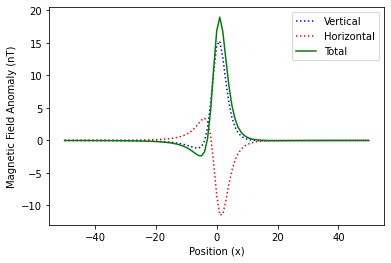

In [14]:
# calling the function
mag_sphere(z,R,k,x,inc)

### **Question 7:** 

Use the mag_sphere function to show the horizontal, vertical, and total field curves for each of the following inclinations. For each plot, write a 1-2 sentence explanation describing the information shown in each plot and what it means for the magnetic anomalies you would see at those places on Earth's surface.

>a. *90° (north pole)*


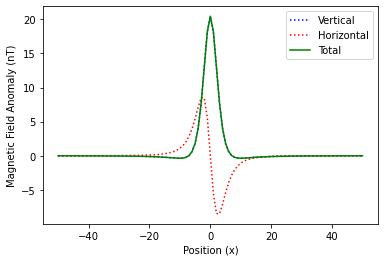

In [18]:
mag_sphere(z,R,k,x,90)

>b. *0° (Equator)*

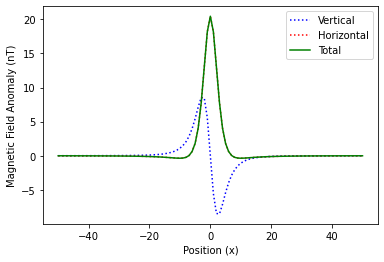

In [16]:
mag_sphere(z,R,k,x,0)

>c. *45° (Salem, OR)*

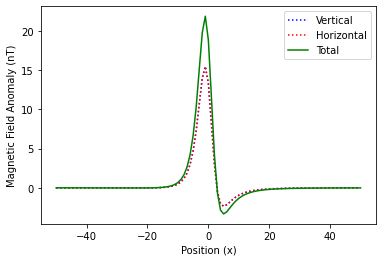

In [17]:
mag_sphere(z,R,k,x,45)

## Buried Rectangular Body 

Now, open GRAVMAG.
1. Make sure the units are meters and cgs.

2. It will default to gravity, but we want to change this. Go to **View**, uncheck Gravity and check Induced Magnetics.

3. Add a body.

4. From the **Window** menu, open the Section.

5. Change your body so that it is a small rectangle in the middle.
> a. You can do this either by changing the vertices by typing in the **Model Table** or
by clicking and dragging them in the **Section** window.

6. At the top of the **Model Table** you can enter **Latitude** and the **Profile Azimuth**.

> a. The **Profile Azimuth** is the azimuth (in degrees from North) of your magnetic
line. If your magnetic line trends North/South, this will be 0. If your magnetic
line trends East/West, this will be 90.

> b. For now, change the profile azimuth to 0 for a North/South line.

7. By default, GRAVMAG plots the total field values, but you can change the plot to look at the horizontal or vertical components.

> a. Open the **Magnetic Data** window.

> b. Use the drop-down menu on the data table to change between total, horizontal,
or vertical components.

> c. Play around with the latitude a little bit. You will see that the results are similar
to those of a buried sphere, which we already have a basic understanding of
from the exercise above.

### **Question 8:**
Set the latitude to 90° (North pole).
>a. Move the rectangle deeper into the subsurface. *What does this do to the curve?*

The slope of the curve decreases in magnitude as the rectangle is moved deeper into the subsurface.

>b. Increase the susceptibility. *What does this do to the total field?*

The field strength increases in magnitude

Despite the added complication of the latitude dependence of magnetic data, you can see that manipulating a simple rectangular body in the subsurface affects magnetic measurements similarly to how it affects gravity measurements. This also means that magnetic surveys have the same problem as gravity surveys: there are multiple subsurface models that can fit the same data set, the inverse problem is not unique. Therefore, the effectiveness of a magnetic study depends on whether there is previous geologic knowledge of the area.

## Real Buried Body: Magnetic Survey
Okay, lets finally get to an example. You are in Arizona (Latitude = 34°N) at an archeological site and are looking for old buried walls. Your colleagues already found one wall, composed of basalt (susceptibility = 0.006 emu). Now you are conducting a magnetic survey to find more walls. You take 101 measurements in a North/South trending line. The results can be found in ArchealogicalData.txt. Load these results into GRAVMAG.

### **Question 9:** 

Create a subsurface model that fits the magnetic data.
>a. *Take a screenshot of the shallow subsurface configuration. Submit to Canvas and import here.*


![](Question9Section.png)

>b. *Does this single survey give you any information about the direction the walls are
extending? If not, how could you figure this out?*

Yes. The peaks are increasing in magnitude.

### **Question 10:** 

> You performed both an induced magnetic survey and a gravity survey looking for
features in the shallow subsurface. When you look at your data, the induced magnetism curve is completely flat, but the gravity survey reveals a large negative anomaly. *What could this feature be? Why is there no induced magnetics?*

It might be because the subsurface where the survey was done had no rocks that contained iron or other materials that create a magnetic field.